In [1]:
!pip install git+https://github.com/modAL-python/modAL.git

  Cloning https://github.com/modAL-python/modAL.git to /tmp/pip-req-build-jzvbfukt
  Running command git clone --filter=blob:none --quiet https://github.com/modAL-python/modAL.git /tmp/pip-req-build-jzvbfukt
  Resolved https://github.com/modAL-python/modAL.git to commit bba6f6fd00dbb862b1e09259b78caf6cffa2e755
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 2.8 MB/s eta 0:00:00
  Created wheel for modAL-python: filename=modAL_python-0.4.2-py3-none-any.whl size=32649 sha256=a79b1e8ac465c1a496c5b7a5169d4204ec423532e2a0e02294db45cc89631897
  Stored in directory: /tmp/pip-ephem-wheel-cache-8jzt796m/wheels/d9/fb/59/7deb61b460c1c36394cd093758986ff7d36f71352dcb2e02c5
Successfully built modAL-python


In [ ]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from modAL.models import Committee
from modAL.disagreement import vote_entropy_sampling
from modAL.models import ActiveLearner
import matplotlib.pyplot as plt
import random
import math
from modAL.disagreement import vote_entropy_sampling
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss
import numpy as np


In [ ]:
lista = []

In [ ]:
def activeLearnersAllSameImportance(howmany, lista):
 # Load the digits dataset
  digits = load_digits()
  X = digits.data
  y = digits.target

  # Split the dataset into a training set and a test set with a test size of 80%
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

  # Initialize a list of ActiveLearner objects
  learners = [ActiveLearner(estimator=RandomForestClassifier(n_estimators=50), X_training=X_train, y_training=y_train) for _ in range(howmany)]

  # Create a Committee object
  committee = Committee(
  learner_list=learners,
  query_strategy=vote_entropy_sampling
  )

  # Train the committee
  committee.fit(X_train, y_train)

  # Store the true labels and the predicted labels for all iterations
  true_labels = []
  predicted_labels = []

  # Iterate through each 20% of the test set
  test_set_size = len(X_test)
  for start_idx in range(0, test_set_size, int(0.2*test_set_size)):
    # Predict the probabilities for the image the model is most unsure about in the current 20% of the test set
    X_test_current_20_percent = X_test[start_idx:start_idx+int(0.2*test_set_size)]
    predicted_probabilities = committee.predict_proba(X_test_current_20_percent)

    # Get the indices of the 5 most uncertain images
    most_uncertain_indices = np.argsort(np.std(predicted_probabilities, axis=1))[-5:]


    # Use the committee's decision as the true label for training
    committee.teach(
        X=X_test_current_20_percent[most_uncertain_indices],
        y=np.argmax(predicted_probabilities[most_uncertain_indices], axis=1)
    )

    # Store the true labels and the predicted labels for the current 20% of the test set
    true_labels.extend(y_test[start_idx:start_idx+int(0.2*test_set_size)])
    predicted_labels.extend(committee.predict(X_test_current_20_percent))

  # Print the classification report and the confusion matrix for the true labels and the predicted labels
  report = classification_report(true_labels, predicted_labels, output_dict=True)
  print(report)
  lista.append(report)
  print(confusion_matrix(true_labels, predicted_labels))

  # Calculate and print the AUC-ROC, log loss, F1 score, precision, recall, and support

  print("F1 Score:", report['macro avg']['f1-score'])
  print("Precision:", report['macro avg']['precision'])
  print("Recall:", report['macro avg']['recall'])
  print("Support:", report['macro avg']['support'])


# **3 active learners all the same**

In [ ]:
activeLearnersAllSameImportance(3, lista)

{'0': {'precision': 0.9568345323741008, 'recall': 0.9925373134328358, 'f1-score': 0.9743589743589743, 'support': 134}, '1': {'precision': 0.95, 'recall': 0.9236111111111112, 'f1-score': 0.9366197183098592, 'support': 144}, '2': {'precision': 0.8951048951048951, 'recall': 0.8888888888888888, 'f1-score': 0.8919860627177701, 'support': 144}, '3': {'precision': 0.9849624060150376, 'recall': 0.891156462585034, 'f1-score': 0.9357142857142856, 'support': 147}, '4': {'precision': 0.9642857142857143, 'recall': 0.9642857142857143, 'f1-score': 0.9642857142857143, 'support': 140}, '5': {'precision': 0.952054794520548, 'recall': 0.9328859060402684, 'f1-score': 0.9423728813559323, 'support': 149}, '6': {'precision': 0.9931972789115646, 'recall': 0.9733333333333334, 'f1-score': 0.9831649831649831, 'support': 150}, '7': {'precision': 0.9125, 'recall': 0.9798657718120806, 'f1-score': 0.9449838187702266, 'support': 149}, '8': {'precision': 0.821917808219178, 'recall': 0.8888888888888888, 'f1-score': 0.8

# **5 active learners all the same**

In [ ]:
activeLearnersAllSameImportance(5, lista)

{'0': {'precision': 0.9640287769784173, 'recall': 1.0, 'f1-score': 0.9816849816849816, 'support': 134}, '1': {'precision': 0.9379310344827586, 'recall': 0.9444444444444444, 'f1-score': 0.9411764705882353, 'support': 144}, '2': {'precision': 0.9338235294117647, 'recall': 0.8819444444444444, 'f1-score': 0.9071428571428571, 'support': 144}, '3': {'precision': 0.9851851851851852, 'recall': 0.9047619047619048, 'f1-score': 0.9432624113475178, 'support': 147}, '4': {'precision': 0.9854014598540146, 'recall': 0.9642857142857143, 'f1-score': 0.9747292418772563, 'support': 140}, '5': {'precision': 0.965034965034965, 'recall': 0.9261744966442953, 'f1-score': 0.9452054794520547, 'support': 149}, '6': {'precision': 0.9931506849315068, 'recall': 0.9666666666666667, 'f1-score': 0.9797297297297298, 'support': 150}, '7': {'precision': 0.9245283018867925, 'recall': 0.9865771812080537, 'f1-score': 0.9545454545454546, 'support': 149}, '8': {'precision': 0.8157894736842105, 'recall': 0.9185185185185185, 'f

# **7 active learners all the same**

In [ ]:
activeLearnersAllSameImportance(7, lista)

{'0': {'precision': 0.9640287769784173, 'recall': 1.0, 'f1-score': 0.9816849816849816, 'support': 134}, '1': {'precision': 0.9383561643835616, 'recall': 0.9513888888888888, 'f1-score': 0.9448275862068966, 'support': 144}, '2': {'precision': 0.916083916083916, 'recall': 0.9097222222222222, 'f1-score': 0.9128919860627178, 'support': 144}, '3': {'precision': 0.9848484848484849, 'recall': 0.8843537414965986, 'f1-score': 0.9318996415770608, 'support': 147}, '4': {'precision': 0.9852941176470589, 'recall': 0.9571428571428572, 'f1-score': 0.9710144927536232, 'support': 140}, '5': {'precision': 0.9591836734693877, 'recall': 0.9463087248322147, 'f1-score': 0.9527027027027025, 'support': 149}, '6': {'precision': 0.9931972789115646, 'recall': 0.9733333333333334, 'f1-score': 0.9831649831649831, 'support': 150}, '7': {'precision': 0.9074074074074074, 'recall': 0.9865771812080537, 'f1-score': 0.9453376205787781, 'support': 149}, '8': {'precision': 0.8391608391608392, 'recall': 0.8888888888888888, 'f

# **Now with 1/4 of the learners having more knowledge (2 times more training) then the others and so, their opinion has weight 1.5**

In [ ]:
def activeLearnersDifferentImportance(howmany, lista):
   # Load the digits dataset
   digits = load_digits()
   X = digits.data
   y = digits.target

   # Split the dataset into a training set and a test set with a test size of 80%
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

   # Initialize a list of ActiveLearner objects
   learners = [ActiveLearner(estimator=RandomForestClassifier(n_estimators=50), X_training=X_train, y_training=y_train) for _ in range(howmany)]

   # Determine the number of learners to be given more training
   num_learners = howmany
   num_additional_training = math.ceil(num_learners / 4)

   # Create a list of learners to be given more training
   additional_training_learners = random.sample(learners, num_additional_training)

   # Train the additional learners twice
   for learner in additional_training_learners:
       learner.fit(X_train, y_train)
       learner.fit(X_train, y_train)

   # Create a custom Committee class
   class CustomCommittee(Committee):
       def __init__(self, learner_list, query_strategy, additional_training_learners):
           super().__init__(learner_list, query_strategy)
           self.additional_training_learners = additional_training_learners

       def predict_proba(self, X):
           probabilities = super().predict_proba(X)
           for learner in self.additional_training_learners:
               learner_idx = self.learner_list.index(learner)
               probabilities[:, learner_idx] *= 1.5
           return probabilities

   # Create a Committee object
   committee = CustomCommittee(
       learner_list=learners,
       query_strategy=vote_entropy_sampling,
       additional_training_learners=additional_training_learners
   )

   # Train the committee
   committee.fit(X_train, y_train)

   # Store the true labels and the predicted labels for all iterations
   true_labels = []
   predicted_labels = []

   # Iterate through each 20% of the test set
   test_set_size = len(X_test)
   for start_idx in range(0, test_set_size, int(0.2*test_set_size)):
       # Predict the probabilities for the image the model is most unsure about in the current 20% of the test set
       X_test_current_20_percent = X_test[start_idx:start_idx+int(0.2*test_set_size)]
       predicted_probabilities = committee.predict_proba(X_test_current_20_percent)

       # Get the indices of the 5 most uncertain images
       most_uncertain_indices = np.argsort(np.std(predicted_probabilities, axis=1))[-5:]

       # Use the committee's decision as the true label for training
       committee.teach(
           X=X_test_current_20_percent[most_uncertain_indices],
           y=np.argmax(predicted_probabilities[most_uncertain_indices], axis=1)
       )

       # Store the true labels and the predicted labels for the current 20% of the test set
       true_labels.extend(y_test[start_idx:start_idx+int(0.2*test_set_size)])
       predicted_labels.extend(committee.predict(X_test_current_20_percent))

   # Print the classification report and the confusion matrix for the true labels and the predicted labels
   report = classification_report(true_labels, predicted_labels, output_dict=True)
   print(report)
   lista.append(report)
   print(confusion_matrix(true_labels, predicted_labels))

   # Calculate and print the AUC-ROC, log loss, F1 score, precision, recall, and support
   print("F1 Score:", report['macro avg']['f1-score'])
   print("Precision:", report['macro avg']['precision'])
   print("Recall:", report['macro avg']['recall'])
   print("Support:", report['macro avg']['support'])


# **3 learners, different importance**

---



In [ ]:
activeLearnersDifferentImportance(3, lista)

{'0': {'precision': 0.9571428571428572, 'recall': 1.0, 'f1-score': 0.9781021897810218, 'support': 134}, '1': {'precision': 0.935251798561151, 'recall': 0.9027777777777778, 'f1-score': 0.9187279151943463, 'support': 144}, '2': {'precision': 0.8726114649681529, 'recall': 0.9513888888888888, 'f1-score': 0.9102990033222591, 'support': 144}, '3': {'precision': 0.9924242424242424, 'recall': 0.891156462585034, 'f1-score': 0.9390681003584229, 'support': 147}, '4': {'precision': 0.9712230215827338, 'recall': 0.9642857142857143, 'f1-score': 0.967741935483871, 'support': 140}, '5': {'precision': 0.9463087248322147, 'recall': 0.9463087248322147, 'f1-score': 0.9463087248322147, 'support': 149}, '6': {'precision': 0.9932432432432432, 'recall': 0.98, 'f1-score': 0.9865771812080537, 'support': 150}, '7': {'precision': 0.91875, 'recall': 0.9865771812080537, 'f1-score': 0.9514563106796117, 'support': 149}, '8': {'precision': 0.8778625954198473, 'recall': 0.8518518518518519, 'f1-score': 0.864661654135338

# **5 learners, different importance**

In [ ]:
activeLearnersDifferentImportance(5, lista)

{'0': {'precision': 0.9436619718309859, 'recall': 1.0, 'f1-score': 0.9710144927536231, 'support': 134}, '1': {'precision': 0.875, 'recall': 0.9722222222222222, 'f1-score': 0.9210526315789473, 'support': 144}, '2': {'precision': 0.9357142857142857, 'recall': 0.9097222222222222, 'f1-score': 0.9225352112676057, 'support': 144}, '3': {'precision': 0.9924242424242424, 'recall': 0.891156462585034, 'f1-score': 0.9390681003584229, 'support': 147}, '4': {'precision': 0.9779411764705882, 'recall': 0.95, 'f1-score': 0.963768115942029, 'support': 140}, '5': {'precision': 0.9647887323943662, 'recall': 0.9194630872483222, 'f1-score': 0.9415807560137458, 'support': 149}, '6': {'precision': 0.993103448275862, 'recall': 0.96, 'f1-score': 0.976271186440678, 'support': 150}, '7': {'precision': 0.901840490797546, 'recall': 0.9865771812080537, 'f1-score': 0.9423076923076924, 'support': 149}, '8': {'precision': 0.8656716417910447, 'recall': 0.8592592592592593, 'f1-score': 0.862453531598513, 'support': 135},

# **7 learners, different importance**

In [ ]:
activeLearnersDifferentImportance(7, lista)

{'0': {'precision': 0.9851851851851852, 'recall': 0.9925373134328358, 'f1-score': 0.9888475836431226, 'support': 134}, '1': {'precision': 0.9424460431654677, 'recall': 0.9097222222222222, 'f1-score': 0.9257950530035336, 'support': 144}, '2': {'precision': 0.8679245283018868, 'recall': 0.9583333333333334, 'f1-score': 0.910891089108911, 'support': 144}, '3': {'precision': 0.9847328244274809, 'recall': 0.8775510204081632, 'f1-score': 0.9280575539568345, 'support': 147}, '4': {'precision': 0.9319727891156463, 'recall': 0.9785714285714285, 'f1-score': 0.9547038327526133, 'support': 140}, '5': {'precision': 0.958904109589041, 'recall': 0.9395973154362416, 'f1-score': 0.9491525423728814, 'support': 149}, '6': {'precision': 1.0, 'recall': 0.9733333333333334, 'f1-score': 0.9864864864864865, 'support': 150}, '7': {'precision': 0.935064935064935, 'recall': 0.9664429530201343, 'f1-score': 0.9504950495049505, 'support': 149}, '8': {'precision': 0.8939393939393939, 'recall': 0.8740740740740741, 'f1-

# **Now with 1/4 of the learners having more knowledge (2 times more training) then the others and so, their opinion has weight 1.5  and other 1/4 has (3 times more training) than the other half and their opinion as weight 2.**

In [ ]:
def activeLearnersDifferentImportanceAndWeights(howmany, lista):   # Load the digits dataset
   digits = load_digits()
   X = digits.data
   y = digits.target

   # Split the dataset into a training set and a test set with a test size of 80%
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

   # Initialize a list of ActiveLearner objects
   learners = [ActiveLearner(estimator=RandomForestClassifier(n_estimators=50), X_training=X_train, y_training=y_train) for _ in range(howmany)]

   # Determine the number of learners to be given more training
   num_learners = howmany
   num_additional_training = min(num_learners, math.ceil(num_learners / 4) * 3) # Adjusted to not exceed total number of learners

   # Create a list of learners to be given more training
   additional_training_learners = random.sample(learners, num_additional_training)


   # Train the additional learners twice
   for learner in additional_training_learners:
       learner.fit(X_train, y_train)
       learner.fit(X_train, y_train)

   # Create a custom Committee class
   class CustomCommittee(Committee):
       def __init__(self, learner_list, query_strategy, additional_training_learners):
           super().__init__(learner_list, query_strategy)
           self.additional_training_learners = additional_training_learners

       def predict_proba(self, X):
           probabilities = super().predict_proba(X)
           for learner in self.additional_training_learners:
               learner_idx = self.learner_list.index(learner)
               probabilities[:, learner_idx] *= 2 # Adjusted to give twice as much weight
           return probabilities

   # Create a Committee object
   committee = CustomCommittee(
       learner_list=learners,
       query_strategy=vote_entropy_sampling,
       additional_training_learners=additional_training_learners
   )

   # Train the committee
   committee.fit(X_train, y_train)

   # Store the true labels and the predicted labels for all iterations
   true_labels = []
   predicted_labels = []

   # Iterate through each 20% of the test set
   test_set_size = len(X_test)
   for start_idx in range(0, test_set_size, int(0.2*test_set_size)):
       # Predict the probabilities for the image the model is most unsure about in the current 20% of the test set
       X_test_current_20_percent = X_test[start_idx:start_idx+int(0.2*test_set_size)]
       predicted_probabilities = committee.predict_proba(X_test_current_20_percent)

       # Get the indices of the 5 most uncertain images
       most_uncertain_indices = np.argsort(np.std(predicted_probabilities, axis=1))[-5:]

       # Use the committee's decision as the true label for training
       committee.teach(
           X=X_test_current_20_percent[most_uncertain_indices],
           y=np.argmax(predicted_probabilities[most_uncertain_indices], axis=1)
       )

       # Store the true labels and the predicted labels for the current 20% of the test set
       true_labels.extend(y_test[start_idx:start_idx+int(0.2*test_set_size)])
       predicted_labels.extend(committee.predict(X_test_current_20_percent))

   # Print the classification report and the confusion matrix for the true labels and the predicted labels
   report = classification_report(true_labels, predicted_labels, output_dict=True)
   print(report)
   lista.append(report)
   print(confusion_matrix(true_labels, predicted_labels))

   # Calculate and print the AUC-ROC, log loss, F1 score, precision, recall, and support
   print("F1 Score:", report['macro avg']['f1-score'])
   print("Precision:", report['macro avg']['precision'])
   print("Recall:", report['macro avg']['recall'])
   print("Support:", report['macro avg']['support'])


# **3 active learners, different importance**

In [ ]:
activeLearnersDifferentImportanceAndWeights(3, lista)

{'0': {'precision': 0.9178082191780822, 'recall': 1.0, 'f1-score': 0.9571428571428571, 'support': 134}, '1': {'precision': 0.8, 'recall': 0.9444444444444444, 'f1-score': 0.8662420382165604, 'support': 144}, '2': {'precision': 0.8303030303030303, 'recall': 0.9513888888888888, 'f1-score': 0.8867313915857605, 'support': 144}, '3': {'precision': 0.9838709677419355, 'recall': 0.8299319727891157, 'f1-score': 0.9003690036900369, 'support': 147}, '4': {'precision': 0.9844961240310077, 'recall': 0.9071428571428571, 'f1-score': 0.9442379182156134, 'support': 140}, '5': {'precision': 0.9637681159420289, 'recall': 0.8926174496644296, 'f1-score': 0.9268292682926829, 'support': 149}, '6': {'precision': 1.0, 'recall': 0.9533333333333334, 'f1-score': 0.9761092150170648, 'support': 150}, '7': {'precision': 0.9056603773584906, 'recall': 0.9664429530201343, 'f1-score': 0.935064935064935, 'support': 149}, '8': {'precision': 0.9024390243902439, 'recall': 0.8222222222222222, 'f1-score': 0.8604651162790697, 

# **5 learners, different importance**

In [ ]:
activeLearnersDifferentImportanceAndWeights(5, lista)

{'0': {'precision': 0.910958904109589, 'recall': 0.9925373134328358, 'f1-score': 0.95, 'support': 134}, '1': {'precision': 0.8662420382165605, 'recall': 0.9444444444444444, 'f1-score': 0.9036544850498339, 'support': 144}, '2': {'precision': 0.8679245283018868, 'recall': 0.9583333333333334, 'f1-score': 0.910891089108911, 'support': 144}, '3': {'precision': 0.9194630872483222, 'recall': 0.9319727891156463, 'f1-score': 0.9256756756756758, 'support': 147}, '4': {'precision': 0.9310344827586207, 'recall': 0.9642857142857143, 'f1-score': 0.9473684210526316, 'support': 140}, '5': {'precision': 0.9637681159420289, 'recall': 0.8926174496644296, 'f1-score': 0.9268292682926829, 'support': 149}, '6': {'precision': 1.0, 'recall': 0.96, 'f1-score': 0.9795918367346939, 'support': 150}, '7': {'precision': 0.92, 'recall': 0.9261744966442953, 'f1-score': 0.9230769230769231, 'support': 149}, '8': {'precision': 0.9565217391304348, 'recall': 0.8148148148148148, 'f1-score': 0.8800000000000001, 'support': 13

# **7 learners, different importances**

In [ ]:
activeLearnersDifferentImportanceAndWeights(7, lista)

{'0': {'precision': 0.9305555555555556, 'recall': 1.0, 'f1-score': 0.9640287769784173, 'support': 134}, '1': {'precision': 0.8831168831168831, 'recall': 0.9444444444444444, 'f1-score': 0.912751677852349, 'support': 144}, '2': {'precision': 0.8846153846153846, 'recall': 0.9583333333333334, 'f1-score': 0.9199999999999999, 'support': 144}, '3': {'precision': 0.9261744966442953, 'recall': 0.9387755102040817, 'f1-score': 0.9324324324324326, 'support': 147}, '4': {'precision': 0.9844961240310077, 'recall': 0.9071428571428571, 'f1-score': 0.9442379182156134, 'support': 140}, '5': {'precision': 0.9006211180124224, 'recall': 0.9731543624161074, 'f1-score': 0.935483870967742, 'support': 149}, '6': {'precision': 0.9668874172185431, 'recall': 0.9733333333333334, 'f1-score': 0.9700996677740864, 'support': 150}, '7': {'precision': 0.9407894736842105, 'recall': 0.959731543624161, 'f1-score': 0.9501661129568106, 'support': 149}, '8': {'precision': 0.9304347826086956, 'recall': 0.7925925925925926, 'f1-

# **A single active**

In [ ]:
def activeLearnerOne(lista):
   # Load the digits dataset
   digits = load_digits()
   X = digits.data
   y = digits.target

   # Split the dataset into a training set and a test set with a test size of 80%
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

   # Initialize a single ActiveLearner object
   learner = ActiveLearner(estimator=RandomForestClassifier(n_estimators=50), X_training=X_train, y_training=y_train)

   # Train the learner
   learner.fit(X_train, y_train)

   # Store the true labels and the predicted labels for all iterations
   true_labels = []
   predicted_labels = []

   # Iterate through each 20% of the test set
   test_set_size = len(X_test)
   for start_idx in range(0, test_set_size, int(0.2*test_set_size)):
       # Predict the probabilities for the image the model is most unsure about in the current 20% of the test set
       X_test_current_20_percent = X_test[start_idx:start_idx+int(0.2*test_set_size)]
       predicted_probabilities = learner.predict_proba(X_test_current_20_percent)

       # Get the indices of the 5 most uncertain images
       most_uncertain_indices = np.argsort(np.std(predicted_probabilities, axis=1))[-5:]

       # Use the learner's decision as the true label for training
       learner.teach(
           X=X_test_current_20_percent[most_uncertain_indices],
           y=np.argmax(predicted_probabilities[most_uncertain_indices], axis=1)
       )

       # Store the true labels and the predicted labels for the current 20% of the test set
       true_labels.extend(y_test[start_idx:start_idx+int(0.2*test_set_size)])
       predicted_labels.extend(learner.predict(X_test_current_20_percent))

   # Print the classification report and the confusion matrix for the true labels and the predicted labels
   report = classification_report(true_labels, predicted_labels, output_dict=True)
   print(report)
   lista.append(report)
   print(confusion_matrix(true_labels, predicted_labels))

   # Calculate and print the AUC-ROC, log loss, F1 score, precision, recall, and support

   print("F1 Score:", report['macro avg']['f1-score'])
   print("Precision:", report['macro avg']['precision'])
   print("Recall:", report['macro avg']['recall'])
   print("Support:", report['macro avg']['support'])


In [ ]:
activeLearnerOne(lista)

{'0': {'precision': 0.9568345323741008, 'recall': 0.9925373134328358, 'f1-score': 0.9743589743589743, 'support': 134}, '1': {'precision': 0.918918918918919, 'recall': 0.9444444444444444, 'f1-score': 0.9315068493150684, 'support': 144}, '2': {'precision': 0.9280575539568345, 'recall': 0.8958333333333334, 'f1-score': 0.9116607773851589, 'support': 144}, '3': {'precision': 0.984375, 'recall': 0.8571428571428571, 'f1-score': 0.9163636363636364, 'support': 147}, '4': {'precision': 0.9705882352941176, 'recall': 0.9428571428571428, 'f1-score': 0.9565217391304348, 'support': 140}, '5': {'precision': 0.9642857142857143, 'recall': 0.9060402684563759, 'f1-score': 0.9342560553633219, 'support': 149}, '6': {'precision': 0.9865771812080537, 'recall': 0.98, 'f1-score': 0.9832775919732442, 'support': 150}, '7': {'precision': 0.875, 'recall': 0.9865771812080537, 'f1-score': 0.9274447949526814, 'support': 149}, '8': {'precision': 0.823943661971831, 'recall': 0.8666666666666667, 'f1-score': 0.84476534296

# **Different estimators**

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from modAL.models import ActiveLearner
import numpy as np
import matplotlib.pyplot as plt

listaSVC= []
listaKNeig = []
listaGaussianNB = []

In [ ]:
def aLAllSameImportanceDifEst(howmany, lista, estimator):
 # Load the digits dataset
  digits = load_digits()
  X = digits.data
  y = digits.target

  # Split the dataset into a training set and a test set with a test size of 80%
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

  # Initialize a list of ActiveLearner objects
  learners = [ActiveLearner(estimator=estimator, X_training=X_train, y_training=y_train) for _ in range(howmany)]
  # Create a Committee object
  committee = Committee(
  learner_list=learners,
  query_strategy=vote_entropy_sampling
  )

  # Train the committee
  committee.fit(X_train, y_train)

  # Store the true labels and the predicted labels for all iterations
  true_labels = []
  predicted_labels = []

  # Iterate through each 20% of the test set
  test_set_size = len(X_test)
  for start_idx in range(0, test_set_size, int(0.2*test_set_size)):
    # Predict the probabilities for the image the model is most unsure about in the current 20% of the test set
    X_test_current_20_percent = X_test[start_idx:start_idx+int(0.2*test_set_size)]
    predicted_probabilities = committee.predict_proba(X_test_current_20_percent)

    # Get the indices of the 5 most uncertain images
    most_uncertain_indices = np.argsort(np.std(predicted_probabilities, axis=1))[-5:]

    # Use the committee's decision as the true label for training
    committee.teach(
        X=X_test_current_20_percent[most_uncertain_indices],
        y=np.argmax(predicted_probabilities[most_uncertain_indices], axis=1)
    )

    # Store the true labels and the predicted labels for the current 20% of the test set
    true_labels.extend(y_test[start_idx:start_idx+int(0.2*test_set_size)])
    predicted_labels.extend(committee.predict(X_test_current_20_percent))

  # Print the classification report and the confusion matrix for the true labels and the predicted labels
  report = classification_report(true_labels, predicted_labels, output_dict=True)
  print(report)
  lista.append(report)
  print(confusion_matrix(true_labels, predicted_labels))

  # Calculate and print the AUC-ROC, log loss, F1 score, precision, recall, and support

  print("F1 Score:", report['macro avg']['f1-score'])
  print("Precision:", report['macro avg']['precision'])
  print("Recall:", report['macro avg']['recall'])
  print("Support:", report['macro avg']['support'])


In [ ]:
aLAllSameImportanceDifEst(3, listaSVC, SVC(probability=True))

{'0': {'precision': 0.9852941176470589, 'recall': 1.0, 'f1-score': 0.9925925925925926, 'support': 134}, '1': {'precision': 0.9517241379310345, 'recall': 0.9583333333333334, 'f1-score': 0.9550173010380624, 'support': 144}, '2': {'precision': 0.9395973154362416, 'recall': 0.9722222222222222, 'f1-score': 0.9556313993174061, 'support': 144}, '3': {'precision': 1.0, 'recall': 0.9047619047619048, 'f1-score': 0.9500000000000001, 'support': 147}, '4': {'precision': 0.9927536231884058, 'recall': 0.9785714285714285, 'f1-score': 0.9856115107913668, 'support': 140}, '5': {'precision': 0.9731543624161074, 'recall': 0.9731543624161074, 'f1-score': 0.9731543624161074, 'support': 149}, '6': {'precision': 0.9932432432432432, 'recall': 0.98, 'f1-score': 0.9865771812080537, 'support': 150}, '7': {'precision': 0.9358974358974359, 'recall': 0.9798657718120806, 'f1-score': 0.957377049180328, 'support': 149}, '8': {'precision': 0.9037037037037037, 'recall': 0.9037037037037037, 'f1-score': 0.9037037037037037,

In [ ]:
aLAllSameImportanceDifEst(3, listaKNeig, KNeighborsClassifier())

{'0': {'precision': 0.9925925925925926, 'recall': 1.0, 'f1-score': 0.996282527881041, 'support': 134}, '1': {'precision': 0.9432624113475178, 'recall': 0.9236111111111112, 'f1-score': 0.9333333333333333, 'support': 144}, '2': {'precision': 0.9452054794520548, 'recall': 0.9583333333333334, 'f1-score': 0.9517241379310345, 'support': 144}, '3': {'precision': 0.9652777777777778, 'recall': 0.9455782312925171, 'f1-score': 0.9553264604810997, 'support': 147}, '4': {'precision': 0.9926470588235294, 'recall': 0.9642857142857143, 'f1-score': 0.9782608695652174, 'support': 140}, '5': {'precision': 0.9602649006622517, 'recall': 0.9731543624161074, 'f1-score': 0.9666666666666668, 'support': 149}, '6': {'precision': 0.9933333333333333, 'recall': 0.9933333333333333, 'f1-score': 0.9933333333333333, 'support': 150}, '7': {'precision': 0.93125, 'recall': 1.0, 'f1-score': 0.964401294498382, 'support': 149}, '8': {'precision': 0.8768115942028986, 'recall': 0.8962962962962963, 'f1-score': 0.886446886446886

In [ ]:
aLAllSameImportanceDifEst(3, listaGaussianNB, GaussianNB())

{'0': {'precision': 1.0, 'recall': 0.9552238805970149, 'f1-score': 0.9770992366412213, 'support': 134}, '1': {'precision': 0.7, 'recall': 0.3402777777777778, 'f1-score': 0.4579439252336448, 'support': 144}, '2': {'precision': 0.8151260504201681, 'recall': 0.6736111111111112, 'f1-score': 0.7376425855513309, 'support': 144}, '3': {'precision': 0.9145299145299145, 'recall': 0.7278911564625851, 'f1-score': 0.8106060606060606, 'support': 147}, '4': {'precision': 0.8811188811188811, 'recall': 0.9, 'f1-score': 0.8904593639575972, 'support': 140}, '5': {'precision': 0.8741721854304636, 'recall': 0.8859060402684564, 'f1-score': 0.8800000000000001, 'support': 149}, '6': {'precision': 0.9583333333333334, 'recall': 0.92, 'f1-score': 0.9387755102040817, 'support': 150}, '7': {'precision': 0.7487179487179487, 'recall': 0.9798657718120806, 'f1-score': 0.8488372093023255, 'support': 149}, '8': {'precision': 0.46, 'recall': 0.8518518518518519, 'f1-score': 0.5974025974025975, 'support': 135}, '9': {'pre

In [ ]:
aLAllSameImportanceDifEst(5, listaSVC, SVC(probability=True))

{'0': {'precision': 0.9852941176470589, 'recall': 1.0, 'f1-score': 0.9925925925925926, 'support': 134}, '1': {'precision': 0.9583333333333334, 'recall': 0.9583333333333334, 'f1-score': 0.9583333333333334, 'support': 144}, '2': {'precision': 0.9395973154362416, 'recall': 0.9722222222222222, 'f1-score': 0.9556313993174061, 'support': 144}, '3': {'precision': 1.0, 'recall': 0.9047619047619048, 'f1-score': 0.9500000000000001, 'support': 147}, '4': {'precision': 0.9927536231884058, 'recall': 0.9785714285714285, 'f1-score': 0.9856115107913668, 'support': 140}, '5': {'precision': 0.9731543624161074, 'recall': 0.9731543624161074, 'f1-score': 0.9731543624161074, 'support': 149}, '6': {'precision': 0.9932432432432432, 'recall': 0.98, 'f1-score': 0.9865771812080537, 'support': 150}, '7': {'precision': 0.930379746835443, 'recall': 0.9865771812080537, 'f1-score': 0.9576547231270359, 'support': 149}, '8': {'precision': 0.924812030075188, 'recall': 0.9111111111111111, 'f1-score': 0.917910447761194, '

In [ ]:
aLAllSameImportanceDifEst(5, listaKNeig, KNeighborsClassifier())

{'0': {'precision': 0.9925925925925926, 'recall': 1.0, 'f1-score': 0.996282527881041, 'support': 134}, '1': {'precision': 0.9432624113475178, 'recall': 0.9236111111111112, 'f1-score': 0.9333333333333333, 'support': 144}, '2': {'precision': 0.9452054794520548, 'recall': 0.9583333333333334, 'f1-score': 0.9517241379310345, 'support': 144}, '3': {'precision': 0.9652777777777778, 'recall': 0.9455782312925171, 'f1-score': 0.9553264604810997, 'support': 147}, '4': {'precision': 0.9926470588235294, 'recall': 0.9642857142857143, 'f1-score': 0.9782608695652174, 'support': 140}, '5': {'precision': 0.9602649006622517, 'recall': 0.9731543624161074, 'f1-score': 0.9666666666666668, 'support': 149}, '6': {'precision': 0.9933333333333333, 'recall': 0.9933333333333333, 'f1-score': 0.9933333333333333, 'support': 150}, '7': {'precision': 0.93125, 'recall': 1.0, 'f1-score': 0.964401294498382, 'support': 149}, '8': {'precision': 0.8768115942028986, 'recall': 0.8962962962962963, 'f1-score': 0.886446886446886

In [ ]:
aLAllSameImportanceDifEst(5, listaGaussianNB, GaussianNB())

{'0': {'precision': 1.0, 'recall': 0.9552238805970149, 'f1-score': 0.9770992366412213, 'support': 134}, '1': {'precision': 0.7, 'recall': 0.3402777777777778, 'f1-score': 0.4579439252336448, 'support': 144}, '2': {'precision': 0.8151260504201681, 'recall': 0.6736111111111112, 'f1-score': 0.7376425855513309, 'support': 144}, '3': {'precision': 0.9145299145299145, 'recall': 0.7278911564625851, 'f1-score': 0.8106060606060606, 'support': 147}, '4': {'precision': 0.8811188811188811, 'recall': 0.9, 'f1-score': 0.8904593639575972, 'support': 140}, '5': {'precision': 0.8741721854304636, 'recall': 0.8859060402684564, 'f1-score': 0.8800000000000001, 'support': 149}, '6': {'precision': 0.9583333333333334, 'recall': 0.92, 'f1-score': 0.9387755102040817, 'support': 150}, '7': {'precision': 0.7487179487179487, 'recall': 0.9798657718120806, 'f1-score': 0.8488372093023255, 'support': 149}, '8': {'precision': 0.46, 'recall': 0.8518518518518519, 'f1-score': 0.5974025974025975, 'support': 135}, '9': {'pre

In [ ]:
aLAllSameImportanceDifEst(7, listaSVC, SVC(probability=True))

{'0': {'precision': 0.9852941176470589, 'recall': 1.0, 'f1-score': 0.9925925925925926, 'support': 134}, '1': {'precision': 0.9586206896551724, 'recall': 0.9652777777777778, 'f1-score': 0.9619377162629758, 'support': 144}, '2': {'precision': 0.9395973154362416, 'recall': 0.9722222222222222, 'f1-score': 0.9556313993174061, 'support': 144}, '3': {'precision': 1.0, 'recall': 0.9047619047619048, 'f1-score': 0.9500000000000001, 'support': 147}, '4': {'precision': 0.9927536231884058, 'recall': 0.9785714285714285, 'f1-score': 0.9856115107913668, 'support': 140}, '5': {'precision': 0.9731543624161074, 'recall': 0.9731543624161074, 'f1-score': 0.9731543624161074, 'support': 149}, '6': {'precision': 0.9932432432432432, 'recall': 0.98, 'f1-score': 0.9865771812080537, 'support': 150}, '7': {'precision': 0.930379746835443, 'recall': 0.9865771812080537, 'f1-score': 0.9576547231270359, 'support': 149}, '8': {'precision': 0.9111111111111111, 'recall': 0.9111111111111111, 'f1-score': 0.9111111111111111,

In [ ]:
aLAllSameImportanceDifEst(7, listaKNeig, KNeighborsClassifier())

{'0': {'precision': 0.9925925925925926, 'recall': 1.0, 'f1-score': 0.996282527881041, 'support': 134}, '1': {'precision': 0.9432624113475178, 'recall': 0.9236111111111112, 'f1-score': 0.9333333333333333, 'support': 144}, '2': {'precision': 0.9452054794520548, 'recall': 0.9583333333333334, 'f1-score': 0.9517241379310345, 'support': 144}, '3': {'precision': 0.9652777777777778, 'recall': 0.9455782312925171, 'f1-score': 0.9553264604810997, 'support': 147}, '4': {'precision': 0.9926470588235294, 'recall': 0.9642857142857143, 'f1-score': 0.9782608695652174, 'support': 140}, '5': {'precision': 0.9602649006622517, 'recall': 0.9731543624161074, 'f1-score': 0.9666666666666668, 'support': 149}, '6': {'precision': 0.9933333333333333, 'recall': 0.9933333333333333, 'f1-score': 0.9933333333333333, 'support': 150}, '7': {'precision': 0.93125, 'recall': 1.0, 'f1-score': 0.964401294498382, 'support': 149}, '8': {'precision': 0.8768115942028986, 'recall': 0.8962962962962963, 'f1-score': 0.886446886446886

In [ ]:
aLAllSameImportanceDifEst(7, listaGaussianNB, GaussianNB())

{'0': {'precision': 1.0, 'recall': 0.9552238805970149, 'f1-score': 0.9770992366412213, 'support': 134}, '1': {'precision': 0.7, 'recall': 0.3402777777777778, 'f1-score': 0.4579439252336448, 'support': 144}, '2': {'precision': 0.8151260504201681, 'recall': 0.6736111111111112, 'f1-score': 0.7376425855513309, 'support': 144}, '3': {'precision': 0.9145299145299145, 'recall': 0.7278911564625851, 'f1-score': 0.8106060606060606, 'support': 147}, '4': {'precision': 0.8811188811188811, 'recall': 0.9, 'f1-score': 0.8904593639575972, 'support': 140}, '5': {'precision': 0.8741721854304636, 'recall': 0.8859060402684564, 'f1-score': 0.8800000000000001, 'support': 149}, '6': {'precision': 0.9583333333333334, 'recall': 0.92, 'f1-score': 0.9387755102040817, 'support': 150}, '7': {'precision': 0.7487179487179487, 'recall': 0.9798657718120806, 'f1-score': 0.8488372093023255, 'support': 149}, '8': {'precision': 0.46, 'recall': 0.8518518518518519, 'f1-score': 0.5974025974025975, 'support': 135}, '9': {'pre

In [ ]:
def aLDifferentImportanceDifEst(howmany, lista, estimator):
   # Load the digits dataset
   digits = load_digits()
   X = digits.data
   y = digits.target

   # Split the dataset into a training set and a test set with a test size of 80%
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

   # Initialize a list of ActiveLearner objects
   learners = [ActiveLearner(estimator=estimator, X_training=X_train, y_training=y_train) for _ in range(howmany)]

   # Determine the number of learners to be given more training
   num_learners = howmany
   num_additional_training = math.ceil(num_learners / 4)

   # Create a list of learners to be given more training
   additional_training_learners = random.sample(learners, num_additional_training)

   # Train the additional learners twice
   for learner in additional_training_learners:
       learner.fit(X_train, y_train)
       learner.fit(X_train, y_train)

   # Create a custom Committee class
   class CustomCommittee(Committee):
       def __init__(self, learner_list, query_strategy, additional_training_learners):
           super().__init__(learner_list, query_strategy)
           self.additional_training_learners = additional_training_learners

       def predict_proba(self, X):
           probabilities = super().predict_proba(X)
           for learner in self.additional_training_learners:
               learner_idx = self.learner_list.index(learner)
               probabilities[:, learner_idx] *= 1.5
           return probabilities

   # Create a Committee object
   committee = CustomCommittee(
       learner_list=learners,
       query_strategy=vote_entropy_sampling,
       additional_training_learners=additional_training_learners
   )

   # Train the committee
   committee.fit(X_train, y_train)

   # Store the true labels and the predicted labels for all iterations
   true_labels = []
   predicted_labels = []

   # Iterate through each 20% of the test set
   test_set_size = len(X_test)
   for start_idx in range(0, test_set_size, int(0.2*test_set_size)):
       # Predict the probabilities for the image the model is most unsure about in the current 20% of the test set
       X_test_current_20_percent = X_test[start_idx:start_idx+int(0.2*test_set_size)]
       predicted_probabilities = committee.predict_proba(X_test_current_20_percent)

       # Get the indices of the 5 most uncertain images
       most_uncertain_indices = np.argsort(np.std(predicted_probabilities, axis=1))[-5:]

       # Use the committee's decision as the true label for training
       committee.teach(
           X=X_test_current_20_percent[most_uncertain_indices],
           y=np.argmax(predicted_probabilities[most_uncertain_indices], axis=1)
       )

       # Store the true labels and the predicted labels for the current 20% of the test set
       true_labels.extend(y_test[start_idx:start_idx+int(0.2*test_set_size)])
       predicted_labels.extend(committee.predict(X_test_current_20_percent))

   # Print the classification report and the confusion matrix for the true labels and the predicted labels
   report = classification_report(true_labels, predicted_labels, output_dict=True)
   print(report)
   lista.append(report)
   print(confusion_matrix(true_labels, predicted_labels))

   # Calculate and print the AUC-ROC, log loss, F1 score, precision, recall, and support
   print("F1 Score:", report['macro avg']['f1-score'])
   print("Precision:", report['macro avg']['precision'])
   print("Recall:", report['macro avg']['recall'])
   print("Support:", report['macro avg']['support'])


In [ ]:
aLDifferentImportanceDifEst(3, listaSVC, SVC(probability=True))

{'0': {'precision': 0.9925925925925926, 'recall': 1.0, 'f1-score': 0.996282527881041, 'support': 134}, '1': {'precision': 0.9577464788732394, 'recall': 0.9444444444444444, 'f1-score': 0.951048951048951, 'support': 144}, '2': {'precision': 0.9038461538461539, 'recall': 0.9791666666666666, 'f1-score': 0.9400000000000001, 'support': 144}, '3': {'precision': 1.0, 'recall': 0.8979591836734694, 'f1-score': 0.9462365591397849, 'support': 147}, '4': {'precision': 0.9928057553956835, 'recall': 0.9857142857142858, 'f1-score': 0.989247311827957, 'support': 140}, '5': {'precision': 0.9664429530201343, 'recall': 0.9664429530201343, 'f1-score': 0.9664429530201343, 'support': 149}, '6': {'precision': 0.9932432432432432, 'recall': 0.98, 'f1-score': 0.9865771812080537, 'support': 150}, '7': {'precision': 0.9483870967741935, 'recall': 0.9865771812080537, 'f1-score': 0.9671052631578947, 'support': 149}, '8': {'precision': 0.917910447761194, 'recall': 0.9111111111111111, 'f1-score': 0.9144981412639405, 's

In [ ]:
aLDifferentImportanceDifEst(3,listaKNeig, KNeighborsClassifier())

{'0': {'precision': 0.9710144927536232, 'recall': 1.0, 'f1-score': 0.9852941176470589, 'support': 134}, '1': {'precision': 0.9432624113475178, 'recall': 0.9236111111111112, 'f1-score': 0.9333333333333333, 'support': 144}, '2': {'precision': 0.9452054794520548, 'recall': 0.9583333333333334, 'f1-score': 0.9517241379310345, 'support': 144}, '3': {'precision': 0.9583333333333334, 'recall': 0.9387755102040817, 'f1-score': 0.9484536082474228, 'support': 147}, '4': {'precision': 0.9926470588235294, 'recall': 0.9642857142857143, 'f1-score': 0.9782608695652174, 'support': 140}, '5': {'precision': 0.9602649006622517, 'recall': 0.9731543624161074, 'f1-score': 0.9666666666666668, 'support': 149}, '6': {'precision': 0.9932885906040269, 'recall': 0.9866666666666667, 'f1-score': 0.9899665551839465, 'support': 150}, '7': {'precision': 0.9254658385093167, 'recall': 1.0, 'f1-score': 0.9612903225806452, 'support': 149}, '8': {'precision': 0.8832116788321168, 'recall': 0.8962962962962963, 'f1-score': 0.88

In [ ]:
aLDifferentImportanceDifEst(3, listaGaussianNB, GaussianNB())

{'0': {'precision': 1.0, 'recall': 0.9552238805970149, 'f1-score': 0.9770992366412213, 'support': 134}, '1': {'precision': 0.6901408450704225, 'recall': 0.3402777777777778, 'f1-score': 0.4558139534883721, 'support': 144}, '2': {'precision': 0.8103448275862069, 'recall': 0.6527777777777778, 'f1-score': 0.7230769230769231, 'support': 144}, '3': {'precision': 0.9217391304347826, 'recall': 0.7210884353741497, 'f1-score': 0.8091603053435116, 'support': 147}, '4': {'precision': 0.875, 'recall': 0.9, 'f1-score': 0.8873239436619719, 'support': 140}, '5': {'precision': 0.8741721854304636, 'recall': 0.8859060402684564, 'f1-score': 0.8800000000000001, 'support': 149}, '6': {'precision': 0.9583333333333334, 'recall': 0.92, 'f1-score': 0.9387755102040817, 'support': 150}, '7': {'precision': 0.7923497267759563, 'recall': 0.9731543624161074, 'f1-score': 0.8734939759036144, 'support': 149}, '8': {'precision': 0.45038167938931295, 'recall': 0.8740740740740741, 'f1-score': 0.5944584382871536, 'support':

In [ ]:
aLDifferentImportanceDifEst(5, listaSVC, SVC(probability=True))

{'0': {'precision': 0.9852941176470589, 'recall': 1.0, 'f1-score': 0.9925925925925926, 'support': 134}, '1': {'precision': 0.952054794520548, 'recall': 0.9652777777777778, 'f1-score': 0.9586206896551724, 'support': 144}, '2': {'precision': 0.9395973154362416, 'recall': 0.9722222222222222, 'f1-score': 0.9556313993174061, 'support': 144}, '3': {'precision': 1.0, 'recall': 0.9047619047619048, 'f1-score': 0.9500000000000001, 'support': 147}, '4': {'precision': 0.9858156028368794, 'recall': 0.9928571428571429, 'f1-score': 0.9893238434163701, 'support': 140}, '5': {'precision': 0.9731543624161074, 'recall': 0.9731543624161074, 'f1-score': 0.9731543624161074, 'support': 149}, '6': {'precision': 0.9932432432432432, 'recall': 0.98, 'f1-score': 0.9865771812080537, 'support': 150}, '7': {'precision': 0.948051948051948, 'recall': 0.9798657718120806, 'f1-score': 0.9636963696369636, 'support': 149}, '8': {'precision': 0.9104477611940298, 'recall': 0.9037037037037037, 'f1-score': 0.9070631970260223, 

In [ ]:
aLDifferentImportanceDifEst(5,listaKNeig, KNeighborsClassifier())

{'0': {'precision': 0.9925925925925926, 'recall': 1.0, 'f1-score': 0.996282527881041, 'support': 134}, '1': {'precision': 0.9558823529411765, 'recall': 0.9027777777777778, 'f1-score': 0.9285714285714286, 'support': 144}, '2': {'precision': 0.9276315789473685, 'recall': 0.9791666666666666, 'f1-score': 0.9527027027027027, 'support': 144}, '3': {'precision': 0.9586206896551724, 'recall': 0.9455782312925171, 'f1-score': 0.952054794520548, 'support': 147}, '4': {'precision': 0.9927536231884058, 'recall': 0.9785714285714285, 'f1-score': 0.9856115107913668, 'support': 140}, '5': {'precision': 0.9602649006622517, 'recall': 0.9731543624161074, 'f1-score': 0.9666666666666668, 'support': 149}, '6': {'precision': 0.9933333333333333, 'recall': 0.9933333333333333, 'f1-score': 0.9933333333333333, 'support': 150}, '7': {'precision': 0.9254658385093167, 'recall': 1.0, 'f1-score': 0.9612903225806452, 'support': 149}, '8': {'precision': 0.9029850746268657, 'recall': 0.8962962962962963, 'f1-score': 0.8996

In [ ]:
aLDifferentImportanceDifEst(5, listaGaussianNB, GaussianNB())

{'0': {'precision': 1.0, 'recall': 0.9552238805970149, 'f1-score': 0.9770992366412213, 'support': 134}, '1': {'precision': 0.6, 'recall': 0.3333333333333333, 'f1-score': 0.42857142857142855, 'support': 144}, '2': {'precision': 0.831858407079646, 'recall': 0.6527777777777778, 'f1-score': 0.7315175097276265, 'support': 144}, '3': {'precision': 0.9217391304347826, 'recall': 0.7210884353741497, 'f1-score': 0.8091603053435116, 'support': 147}, '4': {'precision': 0.9130434782608695, 'recall': 0.9, 'f1-score': 0.9064748201438848, 'support': 140}, '5': {'precision': 0.8627450980392157, 'recall': 0.8859060402684564, 'f1-score': 0.8741721854304637, 'support': 149}, '6': {'precision': 0.958041958041958, 'recall': 0.9133333333333333, 'f1-score': 0.9351535836177474, 'support': 150}, '7': {'precision': 0.7795698924731183, 'recall': 0.9731543624161074, 'f1-score': 0.8656716417910448, 'support': 149}, '8': {'precision': 0.44360902255639095, 'recall': 0.8740740740740741, 'f1-score': 0.5885286783042394,

In [ ]:
aLDifferentImportanceDifEst(7, listaSVC, SVC(probability=True))

{'0': {'precision': 0.9852941176470589, 'recall': 1.0, 'f1-score': 0.9925925925925926, 'support': 134}, '1': {'precision': 0.9513888888888888, 'recall': 0.9513888888888888, 'f1-score': 0.9513888888888888, 'support': 144}, '2': {'precision': 0.9096774193548387, 'recall': 0.9791666666666666, 'f1-score': 0.94314381270903, 'support': 144}, '3': {'precision': 1.0, 'recall': 0.8979591836734694, 'f1-score': 0.9462365591397849, 'support': 147}, '4': {'precision': 0.9927536231884058, 'recall': 0.9785714285714285, 'f1-score': 0.9856115107913668, 'support': 140}, '5': {'precision': 0.9731543624161074, 'recall': 0.9731543624161074, 'f1-score': 0.9731543624161074, 'support': 149}, '6': {'precision': 0.9932432432432432, 'recall': 0.98, 'f1-score': 0.9865771812080537, 'support': 150}, '7': {'precision': 0.9363057324840764, 'recall': 0.9865771812080537, 'f1-score': 0.9607843137254902, 'support': 149}, '8': {'precision': 0.9242424242424242, 'recall': 0.9037037037037037, 'f1-score': 0.9138576779026217, 

In [ ]:
aLDifferentImportanceDifEst(7,listaKNeig, KNeighborsClassifier())

{'0': {'precision': 0.9925925925925926, 'recall': 1.0, 'f1-score': 0.996282527881041, 'support': 134}, '1': {'precision': 0.9428571428571428, 'recall': 0.9166666666666666, 'f1-score': 0.9295774647887323, 'support': 144}, '2': {'precision': 0.9452054794520548, 'recall': 0.9583333333333334, 'f1-score': 0.9517241379310345, 'support': 144}, '3': {'precision': 0.9788732394366197, 'recall': 0.9455782312925171, 'f1-score': 0.9619377162629758, 'support': 147}, '4': {'precision': 0.9926470588235294, 'recall': 0.9642857142857143, 'f1-score': 0.9782608695652174, 'support': 140}, '5': {'precision': 0.9419354838709677, 'recall': 0.9798657718120806, 'f1-score': 0.9605263157894737, 'support': 149}, '6': {'precision': 0.9738562091503268, 'recall': 0.9933333333333333, 'f1-score': 0.9834983498349835, 'support': 150}, '7': {'precision': 0.9254658385093167, 'recall': 1.0, 'f1-score': 0.9612903225806452, 'support': 149}, '8': {'precision': 0.8814814814814815, 'recall': 0.8814814814814815, 'f1-score': 0.881

In [ ]:
aLDifferentImportanceDifEst(7, listaGaussianNB, GaussianNB())

{'0': {'precision': 1.0, 'recall': 0.9552238805970149, 'f1-score': 0.9770992366412213, 'support': 134}, '1': {'precision': 0.6486486486486487, 'recall': 0.3333333333333333, 'f1-score': 0.44036697247706424, 'support': 144}, '2': {'precision': 0.8034188034188035, 'recall': 0.6527777777777778, 'f1-score': 0.7203065134099617, 'support': 144}, '3': {'precision': 0.9217391304347826, 'recall': 0.7210884353741497, 'f1-score': 0.8091603053435116, 'support': 147}, '4': {'precision': 0.8873239436619719, 'recall': 0.9, 'f1-score': 0.8936170212765958, 'support': 140}, '5': {'precision': 0.88, 'recall': 0.8859060402684564, 'f1-score': 0.8829431438127091, 'support': 149}, '6': {'precision': 0.9647887323943662, 'recall': 0.9133333333333333, 'f1-score': 0.9383561643835617, 'support': 150}, '7': {'precision': 0.7923497267759563, 'recall': 0.9731543624161074, 'f1-score': 0.8734939759036144, 'support': 149}, '8': {'precision': 0.44528301886792454, 'recall': 0.8740740740740741, 'f1-score': 0.59, 'support':

1/4 e 1/4 com estimators

In [ ]:
def aLDifferentImportanceAndWeightsDifEst(howmany, lista, estimator):   # Load the digits dataset
   digits = load_digits()
   X = digits.data
   y = digits.target

   # Split the dataset into a training set and a test set with a test size of 80%
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

   # Initialize a list of ActiveLearner objects
   learners = [ActiveLearner(estimator=estimator, X_training=X_train, y_training=y_train) for _ in range(howmany)]

   # Determine the number of learners to be given more training
   num_learners = howmany
   num_additional_training = min(num_learners, math.ceil(num_learners / 4) * 3) # Adjusted to not exceed total number of learners

   # Create a list of learners to be given more training
   additional_training_learners = random.sample(learners, num_additional_training)


   # Train the additional learners twice
   for learner in additional_training_learners:
       learner.fit(X_train, y_train)
       learner.fit(X_train, y_train)

   # Create a custom Committee class
   class CustomCommittee(Committee):
       def __init__(self, learner_list, query_strategy, additional_training_learners):
           super().__init__(learner_list, query_strategy)
           self.additional_training_learners = additional_training_learners

       def predict_proba(self, X):
           probabilities = super().predict_proba(X)
           for learner in self.additional_training_learners:
               learner_idx = self.learner_list.index(learner)
               probabilities[:, learner_idx] *= 2 # Adjusted to give twice as much weight
           return probabilities

   # Create a Committee object
   committee = CustomCommittee(
       learner_list=learners,
       query_strategy=vote_entropy_sampling,
       additional_training_learners=additional_training_learners
   )

   # Train the committee
   committee.fit(X_train, y_train)

   # Store the true labels and the predicted labels for all iterations
   true_labels = []
   predicted_labels = []

   # Iterate through each 20% of the test set
   test_set_size = len(X_test)
   for start_idx in range(0, test_set_size, int(0.2*test_set_size)):
       # Predict the probabilities for the image the model is most unsure about in the current 20% of the test set
       X_test_current_20_percent = X_test[start_idx:start_idx+int(0.2*test_set_size)]
       predicted_probabilities = committee.predict_proba(X_test_current_20_percent)

       # Get the indices of the 5 most uncertain images
       most_uncertain_indices = np.argsort(np.std(predicted_probabilities, axis=1))[-5:]

       # Use the committee's decision as the true label for training
       committee.teach(
           X=X_test_current_20_percent[most_uncertain_indices],
           y=np.argmax(predicted_probabilities[most_uncertain_indices], axis=1)
       )

       # Store the true labels and the predicted labels for the current 20% of the test set
       true_labels.extend(y_test[start_idx:start_idx+int(0.2*test_set_size)])
       predicted_labels.extend(committee.predict(X_test_current_20_percent))

   # Print the classification report and the confusion matrix for the true labels and the predicted labels
   report = classification_report(true_labels, predicted_labels, output_dict=True)
   print(report)
   lista.append(report)
   print(confusion_matrix(true_labels, predicted_labels))

   # Calculate and print the AUC-ROC, log loss, F1 score, precision, recall, and support
   print("F1 Score:", report['macro avg']['f1-score'])
   print("Precision:", report['macro avg']['precision'])
   print("Recall:", report['macro avg']['recall'])
   print("Support:", report['macro avg']['support'])


In [ ]:
aLDifferentImportanceAndWeightsDifEst(3, listaSVC, SVC(probability=True))

{'0': {'precision': 0.9852941176470589, 'recall': 1.0, 'f1-score': 0.9925925925925926, 'support': 134}, '1': {'precision': 0.9383561643835616, 'recall': 0.9513888888888888, 'f1-score': 0.9448275862068966, 'support': 144}, '2': {'precision': 0.9102564102564102, 'recall': 0.9861111111111112, 'f1-score': 0.9466666666666667, 'support': 144}, '3': {'precision': 1.0, 'recall': 0.891156462585034, 'f1-score': 0.9424460431654677, 'support': 147}, '4': {'precision': 0.9927536231884058, 'recall': 0.9785714285714285, 'f1-score': 0.9856115107913668, 'support': 140}, '5': {'precision': 0.972972972972973, 'recall': 0.9664429530201343, 'f1-score': 0.9696969696969697, 'support': 149}, '6': {'precision': 0.9932432432432432, 'recall': 0.98, 'f1-score': 0.9865771812080537, 'support': 150}, '7': {'precision': 0.9240506329113924, 'recall': 0.9798657718120806, 'f1-score': 0.9511400651465798, 'support': 149}, '8': {'precision': 0.937984496124031, 'recall': 0.8962962962962963, 'f1-score': 0.9166666666666667, '

In [ ]:
aLDifferentImportanceAndWeightsDifEst(3,listaKNeig, KNeighborsClassifier())

{'0': {'precision': 0.9781021897810219, 'recall': 1.0, 'f1-score': 0.988929889298893, 'support': 134}, '1': {'precision': 0.8910256410256411, 'recall': 0.9652777777777778, 'f1-score': 0.9266666666666667, 'support': 144}, '2': {'precision': 0.9337748344370861, 'recall': 0.9791666666666666, 'f1-score': 0.9559322033898305, 'support': 144}, '3': {'precision': 0.9583333333333334, 'recall': 0.9387755102040817, 'f1-score': 0.9484536082474228, 'support': 147}, '4': {'precision': 0.9925373134328358, 'recall': 0.95, 'f1-score': 0.9708029197080291, 'support': 140}, '5': {'precision': 0.9602649006622517, 'recall': 0.9731543624161074, 'f1-score': 0.9666666666666668, 'support': 149}, '6': {'precision': 1.0, 'recall': 0.9866666666666667, 'f1-score': 0.9932885906040269, 'support': 150}, '7': {'precision': 0.9254658385093167, 'recall': 1.0, 'f1-score': 0.9612903225806452, 'support': 149}, '8': {'precision': 0.936, 'recall': 0.8666666666666667, 'f1-score': 0.9, 'support': 135}, '9': {'precision': 0.9770

In [ ]:
aLDifferentImportanceAndWeightsDifEst(3,listaGaussianNB, GaussianNB())

{'0': {'precision': 1.0, 'recall': 0.9552238805970149, 'f1-score': 0.9770992366412213, 'support': 134}, '1': {'precision': 0.7125, 'recall': 0.3958333333333333, 'f1-score': 0.5089285714285714, 'support': 144}, '2': {'precision': 0.8144329896907216, 'recall': 0.5486111111111112, 'f1-score': 0.6556016597510373, 'support': 144}, '3': {'precision': 0.9137931034482759, 'recall': 0.7210884353741497, 'f1-score': 0.8060836501901141, 'support': 147}, '4': {'precision': 0.8811188811188811, 'recall': 0.9, 'f1-score': 0.8904593639575972, 'support': 140}, '5': {'precision': 0.868421052631579, 'recall': 0.8859060402684564, 'f1-score': 0.8770764119601329, 'support': 149}, '6': {'precision': 0.965034965034965, 'recall': 0.92, 'f1-score': 0.9419795221843004, 'support': 150}, '7': {'precision': 0.7923497267759563, 'recall': 0.9731543624161074, 'f1-score': 0.8734939759036144, 'support': 149}, '8': {'precision': 0.427536231884058, 'recall': 0.8740740740740741, 'f1-score': 0.5742092457420924, 'support': 13

In [ ]:
aLDifferentImportanceAndWeightsDifEst(5, listaSVC, SVC(probability=True))

{'0': {'precision': 0.9852941176470589, 'recall': 1.0, 'f1-score': 0.9925925925925926, 'support': 134}, '1': {'precision': 0.9387755102040817, 'recall': 0.9583333333333334, 'f1-score': 0.9484536082474228, 'support': 144}, '2': {'precision': 0.9342105263157895, 'recall': 0.9861111111111112, 'f1-score': 0.9594594594594595, 'support': 144}, '3': {'precision': 0.9927536231884058, 'recall': 0.9319727891156463, 'f1-score': 0.9614035087719299, 'support': 147}, '4': {'precision': 0.9790209790209791, 'recall': 1.0, 'f1-score': 0.989399293286219, 'support': 140}, '5': {'precision': 0.9731543624161074, 'recall': 0.9731543624161074, 'f1-score': 0.9731543624161074, 'support': 149}, '6': {'precision': 0.9931972789115646, 'recall': 0.9733333333333334, 'f1-score': 0.9831649831649831, 'support': 150}, '7': {'precision': 0.9539473684210527, 'recall': 0.9731543624161074, 'f1-score': 0.9634551495016611, 'support': 149}, '8': {'precision': 0.9453125, 'recall': 0.8962962962962963, 'f1-score': 0.920152091254

In [ ]:
aLDifferentImportanceAndWeightsDifEst(5,listaKNeig, KNeighborsClassifier())

{'0': {'precision': 0.9781021897810219, 'recall': 1.0, 'f1-score': 0.988929889298893, 'support': 134}, '1': {'precision': 0.8910256410256411, 'recall': 0.9652777777777778, 'f1-score': 0.9266666666666667, 'support': 144}, '2': {'precision': 0.9463087248322147, 'recall': 0.9791666666666666, 'f1-score': 0.962457337883959, 'support': 144}, '3': {'precision': 0.9215686274509803, 'recall': 0.9591836734693877, 'f1-score': 0.9400000000000001, 'support': 147}, '4': {'precision': 0.9716312056737588, 'recall': 0.9785714285714285, 'f1-score': 0.9750889679715302, 'support': 140}, '5': {'precision': 0.9602649006622517, 'recall': 0.9731543624161074, 'f1-score': 0.9666666666666668, 'support': 149}, '6': {'precision': 1.0, 'recall': 0.9866666666666667, 'f1-score': 0.9932885906040269, 'support': 150}, '7': {'precision': 0.9490445859872612, 'recall': 1.0, 'f1-score': 0.9738562091503268, 'support': 149}, '8': {'precision': 0.9495798319327731, 'recall': 0.837037037037037, 'f1-score': 0.889763779527559, 'su

In [ ]:
aLDifferentImportanceAndWeightsDifEst(5,listaGaussianNB, GaussianNB())

{'0': {'precision': 1.0, 'recall': 0.9626865671641791, 'f1-score': 0.9809885931558935, 'support': 134}, '1': {'precision': 0.6842105263157895, 'recall': 0.3611111111111111, 'f1-score': 0.4727272727272728, 'support': 144}, '2': {'precision': 0.8448275862068966, 'recall': 0.6805555555555556, 'f1-score': 0.7538461538461538, 'support': 144}, '3': {'precision': 0.905982905982906, 'recall': 0.7210884353741497, 'f1-score': 0.8030303030303031, 'support': 147}, '4': {'precision': 0.9, 'recall': 0.9, 'f1-score': 0.9, 'support': 140}, '5': {'precision': 0.8618421052631579, 'recall': 0.8791946308724832, 'f1-score': 0.8704318936877075, 'support': 149}, '6': {'precision': 0.9583333333333334, 'recall': 0.92, 'f1-score': 0.9387755102040817, 'support': 150}, '7': {'precision': 0.7923497267759563, 'recall': 0.9731543624161074, 'f1-score': 0.8734939759036144, 'support': 149}, '8': {'precision': 0.46124031007751937, 'recall': 0.8814814814814815, 'f1-score': 0.6055979643765903, 'support': 135}, '9': {'prec

In [ ]:
aLDifferentImportanceAndWeightsDifEst(7, listaSVC, SVC(probability=True))

{'0': {'precision': 0.9852941176470589, 'recall': 1.0, 'f1-score': 0.9925925925925926, 'support': 134}, '1': {'precision': 0.9459459459459459, 'recall': 0.9722222222222222, 'f1-score': 0.9589041095890412, 'support': 144}, '2': {'precision': 0.9655172413793104, 'recall': 0.9722222222222222, 'f1-score': 0.9688581314878894, 'support': 144}, '3': {'precision': 0.9929078014184397, 'recall': 0.9523809523809523, 'f1-score': 0.9722222222222222, 'support': 147}, '4': {'precision': 0.9790209790209791, 'recall': 1.0, 'f1-score': 0.989399293286219, 'support': 140}, '5': {'precision': 0.9666666666666667, 'recall': 0.9731543624161074, 'f1-score': 0.9698996655518394, 'support': 149}, '6': {'precision': 0.9932432432432432, 'recall': 0.98, 'f1-score': 0.9865771812080537, 'support': 150}, '7': {'precision': 0.9602649006622517, 'recall': 0.9731543624161074, 'f1-score': 0.9666666666666668, 'support': 149}, '8': {'precision': 0.9312977099236641, 'recall': 0.9037037037037037, 'f1-score': 0.9172932330827067,

In [ ]:
aLDifferentImportanceAndWeightsDifEst(7,listaKNeig, KNeighborsClassifier())

{'0': {'precision': 0.9852941176470589, 'recall': 1.0, 'f1-score': 0.9925925925925926, 'support': 134}, '1': {'precision': 0.8782051282051282, 'recall': 0.9513888888888888, 'f1-score': 0.9133333333333333, 'support': 144}, '2': {'precision': 0.9463087248322147, 'recall': 0.9791666666666666, 'f1-score': 0.962457337883959, 'support': 144}, '3': {'precision': 0.9155844155844156, 'recall': 0.9591836734693877, 'f1-score': 0.93687707641196, 'support': 147}, '4': {'precision': 0.9924812030075187, 'recall': 0.9428571428571428, 'f1-score': 0.967032967032967, 'support': 140}, '5': {'precision': 0.9477124183006536, 'recall': 0.9731543624161074, 'f1-score': 0.9602649006622517, 'support': 149}, '6': {'precision': 0.9802631578947368, 'recall': 0.9933333333333333, 'f1-score': 0.9867549668874172, 'support': 150}, '7': {'precision': 0.93125, 'recall': 1.0, 'f1-score': 0.964401294498382, 'support': 149}, '8': {'precision': 0.9411764705882353, 'recall': 0.8296296296296296, 'f1-score': 0.8818897637795274, 

In [ ]:
aLDifferentImportanceAndWeightsDifEst(7,listaGaussianNB, GaussianNB())

{'0': {'precision': 1.0, 'recall': 0.9552238805970149, 'f1-score': 0.9770992366412213, 'support': 134}, '1': {'precision': 0.6865671641791045, 'recall': 0.3194444444444444, 'f1-score': 0.4360189573459715, 'support': 144}, '2': {'precision': 0.8151260504201681, 'recall': 0.6736111111111112, 'f1-score': 0.7376425855513309, 'support': 144}, '3': {'precision': 0.9166666666666666, 'recall': 0.7482993197278912, 'f1-score': 0.8239700374531835, 'support': 147}, '4': {'precision': 0.8811188811188811, 'recall': 0.9, 'f1-score': 0.8904593639575972, 'support': 140}, '5': {'precision': 0.869281045751634, 'recall': 0.8926174496644296, 'f1-score': 0.8807947019867549, 'support': 149}, '6': {'precision': 0.9523809523809523, 'recall': 0.9333333333333333, 'f1-score': 0.9427609427609427, 'support': 150}, '7': {'precision': 0.7923497267759563, 'recall': 0.9731543624161074, 'f1-score': 0.8734939759036144, 'support': 149}, '8': {'precision': 0.4627450980392157, 'recall': 0.8740740740740741, 'f1-score': 0.605

One

In [ ]:
def activeLearnerOneDifferentEst(lista, estimator):
 # Load the digits dataset
 digits = load_digits()
 X = digits.data
 y = digits.target

 # Split the dataset into a training set and a test set with a test size of 80%
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

 # Initialize a single ActiveLearner object
 learner = ActiveLearner(estimator=estimator, X_training=X_train, y_training=y_train)

 # Train the learner
 learner.fit(X_train, y_train)

 # Store the true labels and the predicted labels for all iterations
 true_labels = []
 predicted_labels = []

 # Iterate through each 20% of the test set
 test_set_size = len(X_test)
 for start_idx in range(0, test_set_size, int(0.2*test_set_size)):
     # Predict the probabilities for the image the model is most unsure about in the current 20% of the test set
     X_test_current_20_percent = X_test[start_idx:start_idx+int(0.2*test_set_size)]
     predicted_probabilities = learner.predict_proba(X_test_current_20_percent)

     # Get the indices of the 5 most uncertain images
     most_uncertain_indices = np.argsort(np.std(predicted_probabilities, axis=1))[-5:]

     # Use the learner's decision as the true label for training
     learner.teach(
         X=X_test_current_20_percent[most_uncertain_indices],
         y=np.argmax(predicted_probabilities[most_uncertain_indices], axis=1)
     )

     # Store the true labels and the predicted labels for the current 20% of the test set
     true_labels.extend(y_test[start_idx:start_idx+int(0.2*test_set_size)])
     predicted_labels.extend(learner.predict(X_test_current_20_percent))

 # Print the classification report and the confusion matrix for the true labels and the predicted labels
 report = classification_report(true_labels, predicted_labels, output_dict=True)
 print(report)
 lista.append(report)
 print(confusion_matrix(true_labels, predicted_labels))

 # Calculate and print the AUC-ROC, log loss, F1 score, precision, recall, and support

 print("F1 Score:", report['macro avg']['f1-score'])
 print("Precision:", report['macro avg']['precision'])
 print("Recall:", report['macro avg']['recall'])
 print("Support:", report['macro avg']['support'])



In [ ]:
# Use SVM as the estimator
activeLearnerOneDifferentEst(listaSVC, SVC(probability=True))

{'0': {'precision': 0.9925925925925926, 'recall': 1.0, 'f1-score': 0.996282527881041, 'support': 134}, '1': {'precision': 0.9455782312925171, 'recall': 0.9652777777777778, 'f1-score': 0.9553264604810997, 'support': 144}, '2': {'precision': 0.9523809523809523, 'recall': 0.9722222222222222, 'f1-score': 0.9621993127147767, 'support': 144}, '3': {'precision': 1.0, 'recall': 0.9115646258503401, 'f1-score': 0.9537366548042704, 'support': 147}, '4': {'precision': 0.9927536231884058, 'recall': 0.9785714285714285, 'f1-score': 0.9856115107913668, 'support': 140}, '5': {'precision': 0.9666666666666667, 'recall': 0.9731543624161074, 'f1-score': 0.9698996655518394, 'support': 149}, '6': {'precision': 0.9932432432432432, 'recall': 0.98, 'f1-score': 0.9865771812080537, 'support': 150}, '7': {'precision': 0.9130434782608695, 'recall': 0.9865771812080537, 'f1-score': 0.9483870967741935, 'support': 149}, '8': {'precision': 0.9384615384615385, 'recall': 0.9037037037037037, 'f1-score': 0.920754716981132, 

In [ ]:

# Use KNN as the estimator
activeLearnerOneDifferentEst(listaKNeig, KNeighborsClassifier())


{'0': {'precision': 0.9925925925925926, 'recall': 1.0, 'f1-score': 0.996282527881041, 'support': 134}, '1': {'precision': 0.9432624113475178, 'recall': 0.9236111111111112, 'f1-score': 0.9333333333333333, 'support': 144}, '2': {'precision': 0.9452054794520548, 'recall': 0.9583333333333334, 'f1-score': 0.9517241379310345, 'support': 144}, '3': {'precision': 0.9652777777777778, 'recall': 0.9455782312925171, 'f1-score': 0.9553264604810997, 'support': 147}, '4': {'precision': 0.9926470588235294, 'recall': 0.9642857142857143, 'f1-score': 0.9782608695652174, 'support': 140}, '5': {'precision': 0.9602649006622517, 'recall': 0.9731543624161074, 'f1-score': 0.9666666666666668, 'support': 149}, '6': {'precision': 0.9933333333333333, 'recall': 0.9933333333333333, 'f1-score': 0.9933333333333333, 'support': 150}, '7': {'precision': 0.93125, 'recall': 1.0, 'f1-score': 0.964401294498382, 'support': 149}, '8': {'precision': 0.8768115942028986, 'recall': 0.8962962962962963, 'f1-score': 0.886446886446886

In [ ]:

# Use Naive Bayes as the estimator
activeLearnerOneDifferentEst(listaGaussianNB, GaussianNB())

{'0': {'precision': 1.0, 'recall': 0.9552238805970149, 'f1-score': 0.9770992366412213, 'support': 134}, '1': {'precision': 0.6956521739130435, 'recall': 0.3333333333333333, 'f1-score': 0.4507042253521127, 'support': 144}, '2': {'precision': 0.8290598290598291, 'recall': 0.6736111111111112, 'f1-score': 0.7432950191570881, 'support': 144}, '3': {'precision': 0.9145299145299145, 'recall': 0.7278911564625851, 'f1-score': 0.8106060606060606, 'support': 147}, '4': {'precision': 0.8689655172413793, 'recall': 0.9, 'f1-score': 0.8842105263157896, 'support': 140}, '5': {'precision': 0.8741721854304636, 'recall': 0.8859060402684564, 'f1-score': 0.8800000000000001, 'support': 149}, '6': {'precision': 0.9583333333333334, 'recall': 0.92, 'f1-score': 0.9387755102040817, 'support': 150}, '7': {'precision': 0.7487179487179487, 'recall': 0.9798657718120806, 'f1-score': 0.8488372093023255, 'support': 149}, '8': {'precision': 0.4581673306772908, 'recall': 0.8518518518518519, 'f1-score': 0.5958549222797926

In [ ]:
valoresNovos = [[],[],[]]
listas = [
listaSVC,
listaKNeig,
listaGaussianNB]
for j in range(len(listas)):
  for i in listas[j]:
    new_dict = {}
    for key in ['accuracy', 'macro avg', 'weighted avg']:
      new_dict[key] = i[key]
    valoresNovos[j].append(new_dict)

In [ ]:
tipos = ["All same importance - 3", "All same importance - 5", "All same importance - 7", "Twice more importance on 1/4 of AL - 3", "Twice more importance on 1/4 of AL - 5", "Twice more importance on 1/4 of AL - 7", "3 times more importance on 1/4, twice more importance on another 1/4 - 3", "3 times more importance on 1/4, twice more importance on another 1/4 - 5", "3 times more importance on 1/4, twice more importance on another 1/4 - 7", "Solo AL" ]
estimadores = ["SVC", "KNeig", "Gaussian"]

for i in range(len(valoresNovos)):
  print(estimadores[i])
  for j in range(len(valoresNovos[i])):
    print(tipos[j])
    print(valoresNovos[i][j])
    print("\n")

SVC
All same importance - 3
{'accuracy': 0.958970792767733, 'macro avg': {'precision': 0.9594831026711553, 'recall': 0.9588968891204341, 'f1-score': 0.9588478659569655, 'support': 1438}, 'weighted avg': {'precision': 0.9596954266129555, 'recall': 0.958970792767733, 'f1-score': 0.9589839839634772, 'support': 1438}}


All same importance - 5
{'accuracy': 0.96105702364395, 'macro avg': {'precision': 0.9617567772175022, 'recall': 0.9609937023076215, 'f1-score': 0.9609897982979522, 'support': 1438}, 'weighted avg': {'precision': 0.9618217143664946, 'recall': 0.96105702364395, 'f1-score': 0.9610459783935592, 'support': 1438}}


All same importance - 7
{'accuracy': 0.9603616133518776, 'macro avg': {'precision': 0.9609324277559994, 'recall': 0.9603182837383674, 'f1-score': 0.9602598241877844, 'support': 1438}, 'weighted avg': {'precision': 0.9610891588603523, 'recall': 0.9603616133518776, 'f1-score': 0.9603518349557613, 'support': 1438}}


Twice more importance on 1/4 of AL - 3
{'accuracy': 0.

In [ ]:
valores = []
for i in lista:
 new_dict = {}
 for key in ['accuracy', 'macro avg', 'weighted avg']:
   new_dict[key] = i[key]
 valores.append(new_dict)
tipos = ["All same importance - 3", "All same importance - 5", "All same importance - 7", "Twice more importance on 1/4 of AL - 3", "Twice more importance on 1/4 of AL - 5", "Twice more importance on 1/4 of AL - 7", "3 times more importance on 1/4, twice more importance on another 1/4 - 3", "3 times more importance on 1/4, twice more importance on another 1/4 - 5", "3 times more importance on 1/4, twice more importance on another 1/4 - 7", "Solo AL" ]
for i in range(len(valores)):
  print(tipos[i])
  print(valores[i])
  print("\n")

All same importance - 3
{'accuracy': 0.935326842837274, 'macro avg': {'precision': 0.9361412984986593, 'recall': 0.9353261609556238, 'f1-score': 0.9351716896402621, 'support': 1438}, 'weighted avg': {'precision': 0.936939274936329, 'recall': 0.935326842837274, 'f1-score': 0.9355708343948983, 'support': 1438}}


All same importance - 5
{'accuracy': 0.9408901251738526, 'macro avg': {'precision': 0.9422681630627698, 'recall': 0.9411181590152123, 'f1-score': 0.9409396343804008, 'support': 1438}, 'weighted avg': {'precision': 0.9430737471322251, 'recall': 0.9408901251738526, 'f1-score': 0.9412398052572062, 'support': 1438}}


All same importance - 7
{'accuracy': 0.9422809457579973, 'macro avg': {'precision': 0.943161660294658, 'recall': 0.9422373372259634, 'f1-score': 0.9421089402613051, 'support': 1438}, 'weighted avg': {'precision': 0.9437786338331006, 'recall': 0.9422809457579973, 'f1-score': 0.9424336471255969, 'support': 1438}}


Twice more importance on 1/4 of AL - 3
{'accuracy': 0.93

In [ ]:
valoresAccuracy = []
for i in valoresNovos:
  accuracy_values = [d['accuracy'] for d in i]
  valoresAccuracy.append(accuracy_values)

In [ ]:
accuracy_values_rf = [d['accuracy'] for d in valores]
valoresAccuracy.append(accuracy_values_rf)

In [ ]:
valoresf1 = []
for i in valoresNovos:
  f1_score_values = [d['weighted avg']['f1-score'] for d in i]
  valoresf1.append(f1_score_values)

f1_score_values_rf = [d['weighted avg']['f1-score'] for d in valores]
valoresf1.append(f1_score_values_rf)

In [ ]:
valoresAccuracy #svc, knei, gaussian, rf

[[0.958970792767733,
  0.96105702364395,
  0.9603616133518776,
  0.958970792767733,
  0.96105702364395,
  0.958970792767733,
  0.9568845618915159,
  0.9631432545201669,
  0.9666203059805285,
  0.9603616133518776],
 [0.9568845618915159,
  0.9568845618915159,
  0.9568845618915159,
  0.954798331015299,
  0.9582753824756607,
  0.9554937413073713,
  0.9541029207232267,
  0.9534075104311543,
  0.9485396383866481,
  0.9568845618915159],
 [0.7962447844228094,
  0.7962447844228094,
  0.7962447844228094,
  0.7962447844228094,
  0.7913769123783032,
  0.7941585535465925,
  0.7906815020862309,
  0.8011126564673157,
  0.8011126564673157,
  0.7955493741307371],
 [0.935326842837274,
  0.9408901251738526,
  0.9422809457579973,
  0.9394993045897079,
  0.9367176634214186,
  0.9408901251738526,
  0.9165507649513213,
  0.9269819193324061,
  0.9318497913769124,
  0.9262865090403338]]

In [ ]:
categories = ["same3", "same5", "same7", "dif3", "dif5", "dif7", "difdif3", "difdif5", "difdif7", "solo"]
data_dict = {category: [] for category in categories}

for sublist in valoresf1:
   for i, value in enumerate(sublist):
       category = categories[i]
       data_dict[category].append(value)

final_data = [data_dict[category] for category in categories]


In [ ]:
final_data

[[0.9589839839634772,
  0.9568628538878311,
  0.7948541759971379,
  0.9355708343948983],
 [0.9610459783935592,
  0.9568628538878311,
  0.7948541759971379,
  0.9412398052572062],
 [0.9603518349557613,
  0.9568628538878311,
  0.7948541759971379,
  0.9424336471255969],
 [0.95898111488861,
  0.9547253257008637,
  0.7956076498776052,
  0.9393924517791563],
 [0.9609971775829372,
  0.9581187187244975,
  0.7918683455124698,
  0.9367583865412316],
 [0.95893543240139,
  0.9553911633128228,
  0.7940927849987386,
  0.9409071378371399],
 [0.9568269000424875,
  0.9538499440586747,
  0.7927599539664585,
  0.9169099499700797],
 [0.9630314346847215,
  0.9527971218991301,
  0.8009566804513012,
  0.926790741334412],
 [0.9665355183415579,
  0.9479750229214031,
  0.7987076711134642,
  0.9312677346200984],
 [0.9603605642110551,
  0.9568628538878311,
  0.7939415614247156,
  0.9264291319381472]]

In [ ]:
final_data.pop() #svc, kneig, gaussian, rf

[0.9603605642110551,
 0.9568628538878311,
 0.7939415614247156,
 0.9264291319381472]

In [ ]:
allsame= final_data[:3]
dif = final_data[3:6]
difdif = final_data[6:]

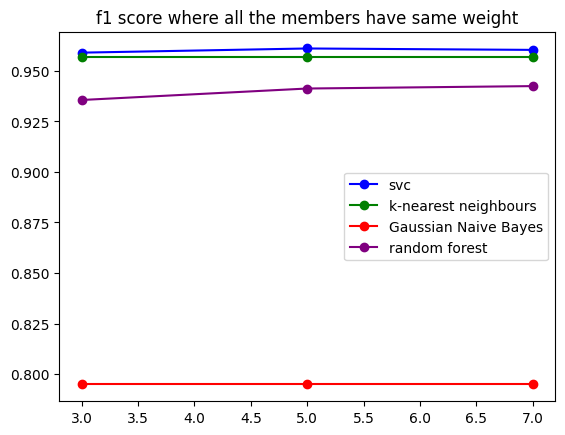

In [ ]:
import matplotlib.pyplot as plt


colors = ['blue', 'green', 'red', 'purple']
fig, ax = plt.subplots() # create a figure and an axes

# iterate over the data and colors
for i in range(len(allsame[0])):
  ax.plot([3, 5, 7], [allsame[0][i], allsame[1][i], allsame[2][i]], marker='o', linestyle='-', color=colors[i], label=['svc', 'k-nearest neighbours', 'Gaussian Naive Bayes', "random forest"][i])

# add a legend
ax.legend()
ax.set_title('f1 score where all the members have same weight')
# show the plot
plt.show()


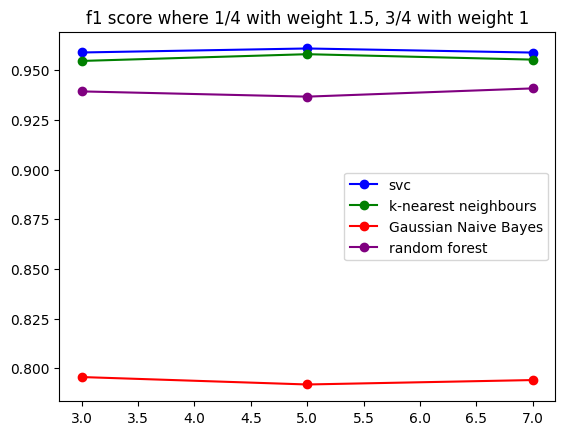

In [ ]:

colors = ['blue', 'green', 'red', 'purple']
fig, ax = plt.subplots() # create a figure and an axes

# iterate over the data and colors
for i in range(len(dif[0])):
  ax.plot([3, 5, 7], [dif[0][i], dif[1][i], dif[2][i]], marker='o', linestyle='-', color=colors[i], label=['svc', 'k-nearest neighbours', 'Gaussian Naive Bayes', "random forest"][i])

# add a legend
ax.legend()
ax.set_title('f1 score where 1/4 with weight 1.5, 3/4 with weight 1')
# show the plot
plt.show()


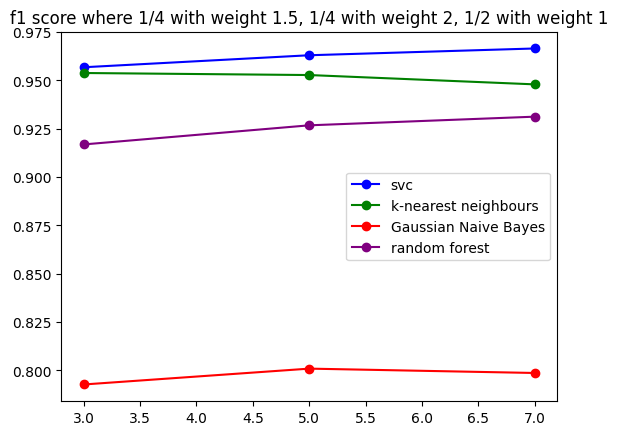

In [ ]:

colors = ['blue', 'green', 'red', 'purple']
fig, ax = plt.subplots() # create a figure and an axes

# iterate over the data and colors
for i in range(len(difdif[0])):
  ax.plot([3, 5, 7], [difdif[0][i], difdif[1][i], difdif[2][i]], marker='o', linestyle='-', color=colors[i], label=['svc', 'k-nearest neighbours', 'Gaussian Naive Bayes', "random forest"][i])

# add a legend
ax.legend()
ax.set_title('f1 score where 1/4 with weight 1.5, 1/4 with weight 2, 1/2 with weight 1')
# show the plot
plt.show()


In [ ]:
categories = ["same3", "same5", "same7", "dif3", "dif5", "dif7", "difdif3", "difdif5", "difdif7", "solo"]
data_dict = {category: [] for category in categories}

for sublist in valoresAccuracy:
   for i, value in enumerate(sublist):
       category = categories[i]
       data_dict[category].append(value)

final_dataac = [data_dict[category] for category in categories]

In [ ]:
final_dataac.pop() #svc, knei, gaussian, rf

[0.9603616133518776,
 0.9568845618915159,
 0.7955493741307371,
 0.9262865090403338]

In [ ]:
allsameac= final_dataac[:3]
difac = final_dataac[3:6]
difdifac = final_dataac[6:]

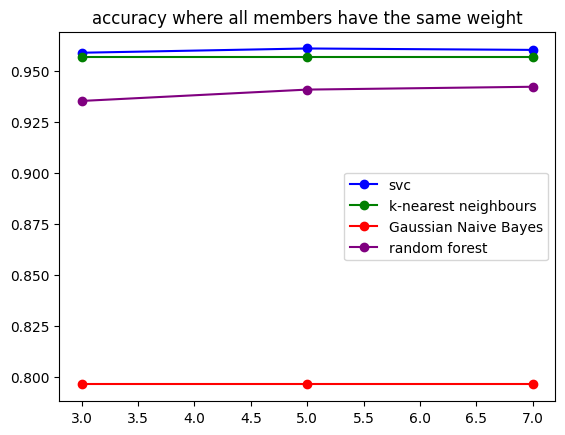

In [ ]:
import matplotlib.pyplot as plt


colors = ['blue', 'green', 'red', 'purple']
fig, ax = plt.subplots() # create a figure and an axes

# iterate over the data and colors
for i in range(len(allsameac[0])):
  ax.plot([3, 5, 7], [allsameac[0][i], allsameac[1][i], allsameac[2][i]], marker='o', linestyle='-', color=colors[i], label=['svc', 'k-nearest neighbours', 'Gaussian Naive Bayes', "random forest"][i])

# add a legend
ax.legend()
ax.set_title('accuracy where all members have the same weight')

# show the plot
plt.show()


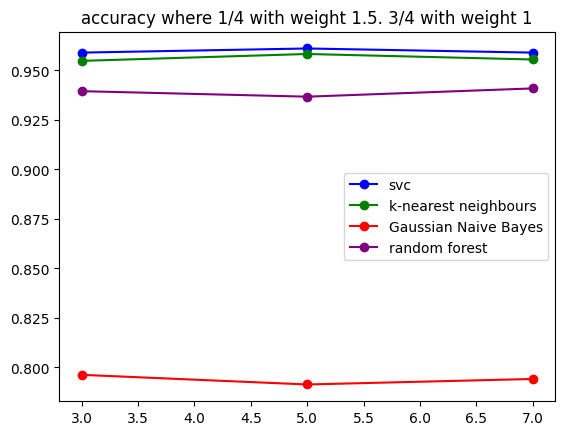

In [ ]:

colors = ['blue', 'green', 'red', 'purple']
fig, ax = plt.subplots() # create a figure and an axes

# iterate over the data and colors
for i in range(len(difac[0])):
  ax.plot([3, 5, 7], [difac[0][i], difac[1][i], difac[2][i]], marker='o', linestyle='-', color=colors[i], label=['svc', 'k-nearest neighbours', 'Gaussian Naive Bayes', "random forest"][i])

# add a legend
ax.legend()
ax.set_title('accuracy where 1/4 with weight 1.5. 3/4 with weight 1')
# show the plot
plt.show()


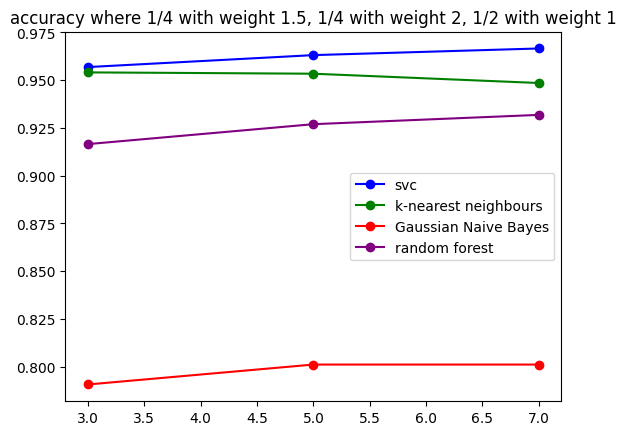

In [ ]:

colors = ['blue', 'green', 'red', 'purple']
fig, ax = plt.subplots() # create a figure and an axes

# iterate over the data and colors
for i in range(len(difdifac[0])):
  ax.plot([3, 5, 7], [difdifac[0][i], difdifac[1][i], difdifac[2][i]], marker='o', linestyle='-', color=colors[i], label=['svc', 'k-nearest neighbours', 'Gaussian Naive Bayes', "random forest"][i])

# add a legend
ax.legend()
ax.set_title('accuracy where 1/4 with weight 1.5, 1/4 with weight 2, 1/2 with weight 1')

# show the plot
plt.show()
